# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 12
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-9
seed = 321
max_surrogate_points = 24
min_Lambda = -4
max_Lambda = 3
min_theta = -3
max_theta = 2
isotropic = False
kernel = "matern"
kernel_params = {"nu": 1.5}
selection_method = "distance"
min_success_rate = 0.2

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_04_20_08_32_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-04_20-08-32 for SummaryWriter()


spotpython tuning: 87.26853277159563 [#---------] 13.00%. Success rate: 100.00% 
spotpython tuning: 87.26853277159563 [#---------] 14.00%. Success rate: 50.00% 
spotpython tuning: 87.26853277159563 [##--------] 15.00%. Success rate: 33.33% 
spotpython tuning: 87.26853277159563 [##--------] 16.00%. Success rate: 25.00% 
spotpython tuning: 87.26853277159563 [##--------] 17.00%. Success rate: 20.00% 
spotpython tuning: 87.26853277159563 [##--------] 18.00%. Success rate: 16.67% 
spotpython tuning: 87.26853277159563 [##--------] 19.00%. Success rate: 14.29% 
spotpython tuning: 87.26853277159563 [##--------] 20.00%. Success rate: 12.50% 
spotpython tuning: 87.26853277159563 [##--------] 21.00%. Success rate: 11.11% 
spotpython tuning: 35.94921800823458 [##--------] 22.00%. Success rate: 20.00% 
spotpython tuning: 32.21001908781546 [##--------] 23.00%. Success rate: 27.27% 
spotpython tuning: 32.21001908781546 [##--------] 24.00%. Success rate: 25.00% 
spotpython tuning: 32.21001908781546 [#

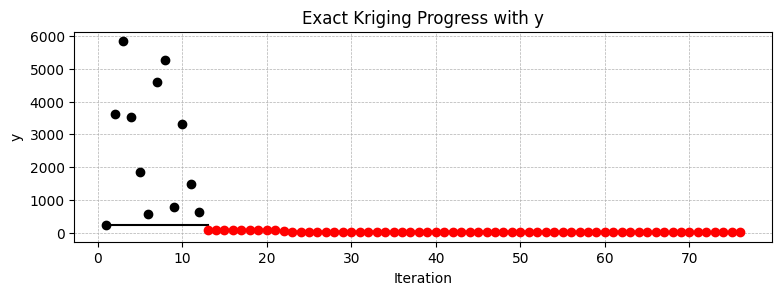

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=False, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [6]:
infill_criterion = "ei"

In [7]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-04_20-09-33 for SummaryWriter()


spotpython tuning: 231.6082434720155 [#---------] 13.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [#---------] 14.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 15.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 16.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 17.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 18.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 19.00%. Success rate: 0.00% 
spotpython tuning: 218.2460313025505 [##--------] 20.00%. Success rate: 12.50% 
spotpython tuning: 218.2460313025505 [##--------] 21.00%. Success rate: 11.11% 
spotpython tuning: 218.2460313025505 [##--------] 22.00%. Success rate: 10.00% 
spotpython tuning: 38.499064543944655 [##--------] 23.00%. Success rate: 18.18% 
spotpython tuning: 38.499064543944655 [##--------] 24.00%. Success rate: 16.67% 
spotpython tuning: 38.499064543944655 [##----

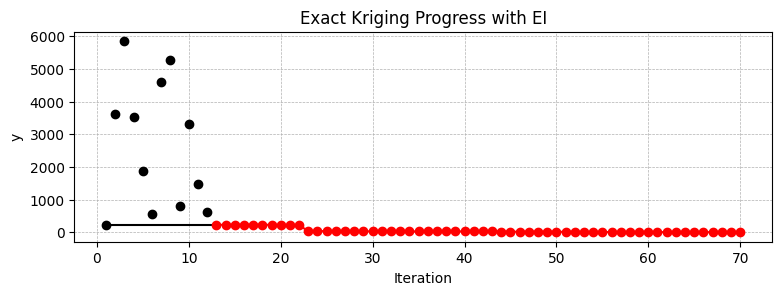

In [8]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [9]:
use_nystrom = True
nystrom_m = 5
infill_criterion = "y"

In [10]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-04_20-10-35 for SummaryWriter()


spotpython tuning: 231.6082434720155 [#---------] 13.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [#---------] 14.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 15.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 16.00%. Success rate: 0.00% 
spotpython tuning: 231.6082434720155 [##--------] 17.00%. Success rate: 0.00% 
spotpython tuning: 231.19323930658226 [##--------] 18.00%. Success rate: 16.67% 
Experiment saved to 000_res.pkl


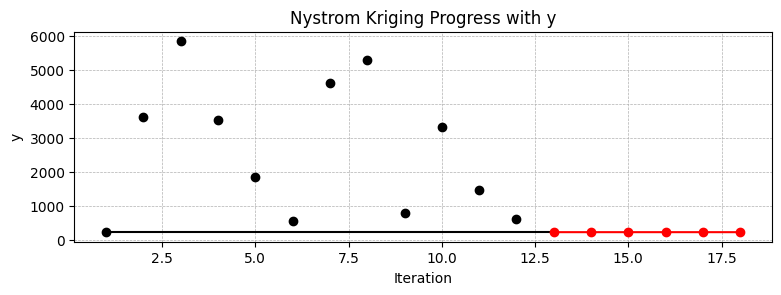

In [11]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [12]:
infill_criterion = "ei"

In [13]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True,
    kernel=kernel,
    kernel_params=kernel_params,
    selection_method=selection_method,
    min_success_rate=min_success_rate
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-04_20-11-46 for SummaryWriter()


spotpython tuning: 231.6082434720155 [#---------] 13.00%. Success rate: 0.00% 
Using spacefilling design as fallback.
spotpython tuning: 231.6082434720155 [#---------] 14.00%. Success rate: 0.00% 
Using spacefilling design as fallback.
spotpython tuning: 231.6082434720155 [##--------] 15.00%. Success rate: 0.00% 
Using spacefilling design as fallback.
spotpython tuning: 231.6082434720155 [##--------] 16.00%. Success rate: 0.00% 
Using spacefilling design as fallback.
spotpython tuning: 231.6082434720155 [##--------] 17.00%. Success rate: 0.00% 
Using spacefilling design as fallback.
spotpython tuning: 231.6082434720155 [##--------] 18.00%. Success rate: 0.00% 
Experiment saved to 000_res.pkl


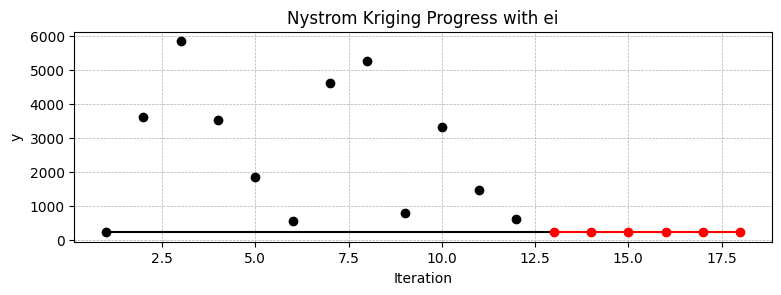

In [14]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [15]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

[6D] Exact Kriging y: min y = 13.6897 at x = [-0.00172065 -0.18121741  0.10414062 -0.19054984  0.05998717 -0.0495831 ]
[6D] Exact Kriging ei: min y = 6.1094 at x = [0.44091926 0.26461978 0.0912799  0.03386939 0.12153452 0.09677829]
[6D] Nyström Kriging y: min y = 231.1932 at x = [ 0.11346136 -0.63574045 -0.16072108  0.09111378  0.48131126  1.365281  ]
[6D] Nyström Kriging ei: min y = 231.6082 at x = [ 0.11374443 -0.63610279 -0.16114611  0.09152994  0.48138116  1.36647492]


x0:  3.8824509726630603
x1:  27.587415392196178
x2:  26.874076308041293
x3:  100.0
x4:  12.436065358763527
x5:  1.6598608845419927


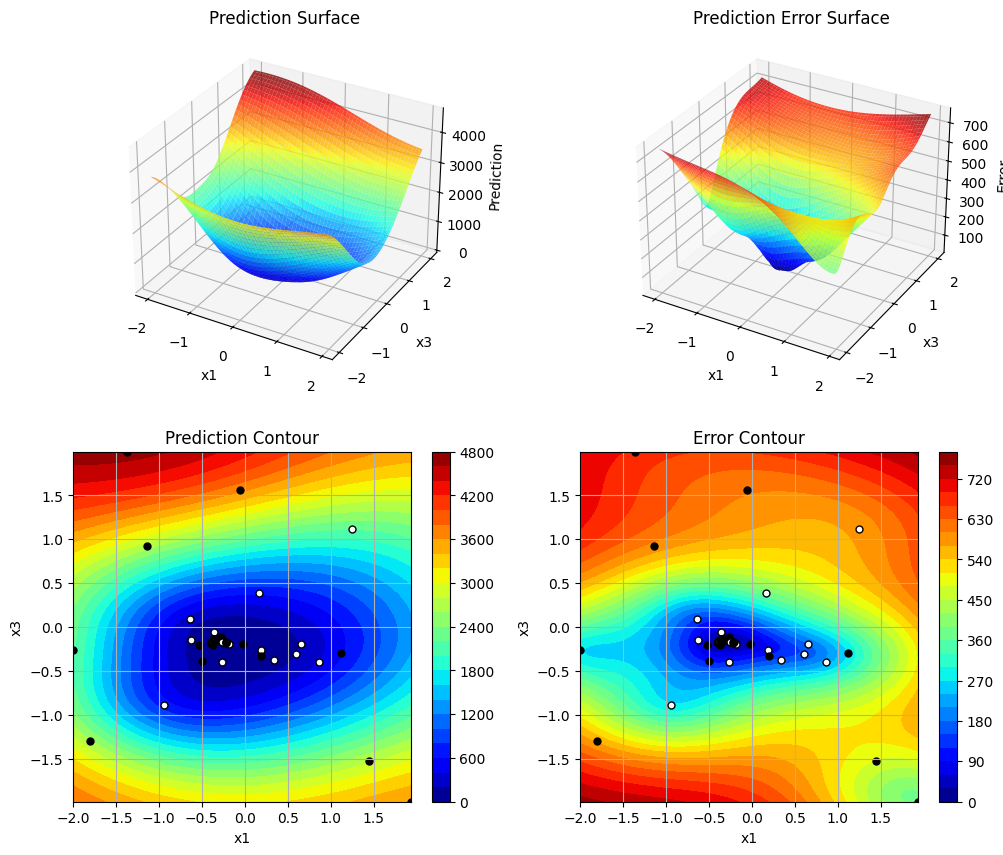

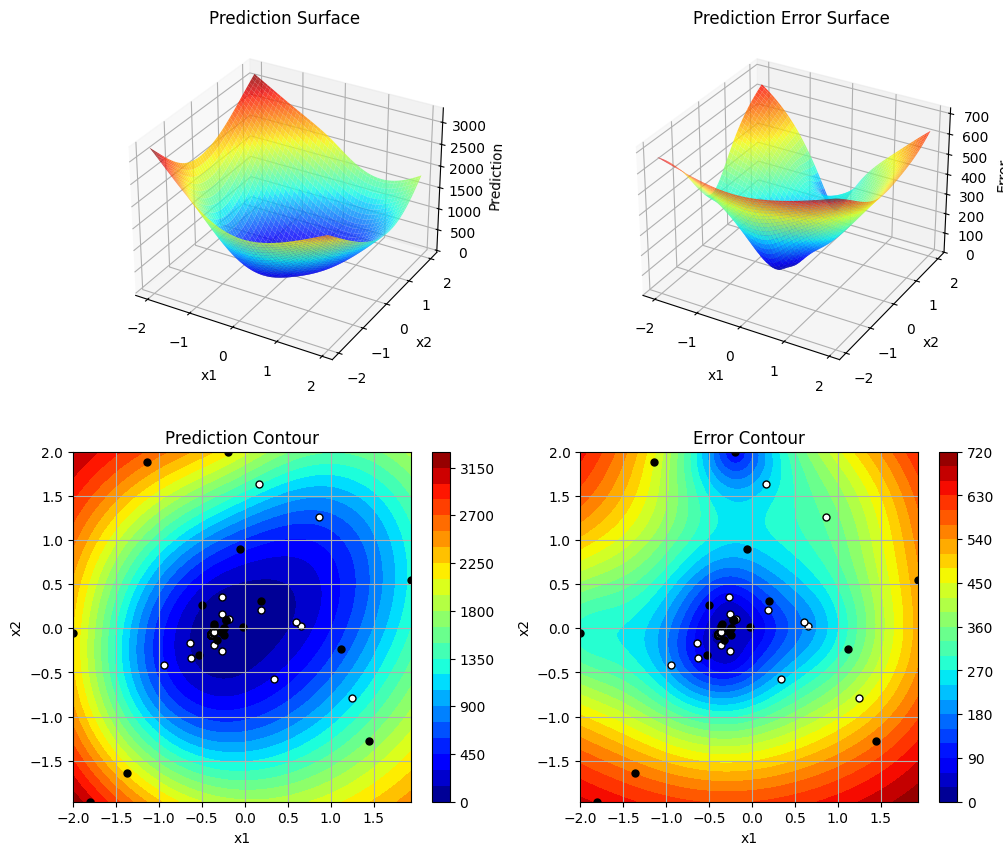

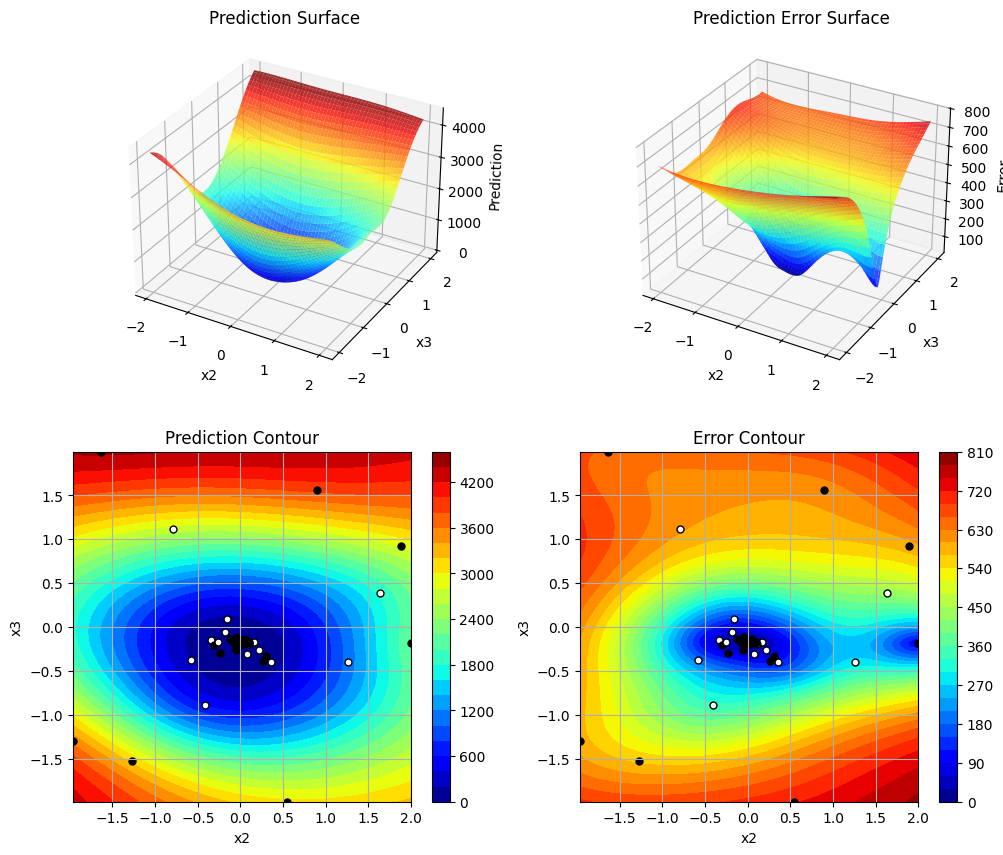

In [16]:
spot_exact_y.plot_important_hyperparameter_contour(max_imp=3)
